In [4]:
# MovieLens 1M Dataset
import pandas as pd
unames=['UserID','Gender','Age','Occupation','Zip-code']
users=pd.read_table('users.dat.txt', sep='::', names=unames, engine='python')

In [7]:
rnames=['UserID','MovieID','Rating','Timestamp']
ratings=pd.read_table('ratings.dat.txt',sep='::',names=rnames, engine='python')

In [8]:
mnames=['MovieID','Title','Genres']
movies=pd.read_table('movies.dat.txt', sep='::',names=mnames,engine='python')

In [9]:
# Merge data to create a single table:

data=pd.merge(pd.merge(ratings, users),movies)

In [10]:
data[:5]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [14]:
data.iloc[0]

UserID                                             1
MovieID                                         1193
Rating                                             5
Timestamp                                  978300760
Gender                                             F
Age                                                1
Occupation                                        10
Zip-code                                       48067
Title         One Flew Over the Cuckoo's Nest (1975)
Genres                                         Drama
Name: 0, dtype: object

In [15]:
# Get mean movie ratings for each film groubed by gender with groupby
frame=pd.DataFrame(data)


In [16]:
frame[:5]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [41]:
mean_ratings

Title                                       Gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kj�rlighetens kj�tere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: Rating, Length: 7152, dtype: float64

In [42]:
# Get mean movie ratings for each film groubed by gender with pivot_table:

mean_ratings_2=pd.pivot_table(frame,values='Rating',index=['Title'],columns=['Gender'],aggfunc='mean')    

In [44]:
mean_ratings_2[:5]

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [51]:
# Filter down to movies that received at least 250 ratings:

rating_counts=frame.groupby('Title').size()

In [52]:
high_rating_films=rating_counts.index[rating_counts>=250]

In [53]:
high_rating_films

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='Title', length=1216)

In [57]:
# Select rows from mean_ratings with the index of titles receiving at least 250 ratings:

mean_ratings_2[:10]

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [58]:
mean_ratings_2=mean_ratings_2.loc[high_rating_films]

In [59]:
mean_ratings_2

Gender,F,M
Title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [66]:
# Top films among femal viewers:

top_films_female=mean_ratings_2.sort_values(by=['F'], ascending = False)

In [68]:
top_films_female[:10]

Gender,F,M
Title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [70]:
mean_ratings_2

Gender,F,M
Title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [78]:
mean_ratings_2['dff']=mean_ratings_2['M']-mean_ratings_2['F']

In [80]:
mean_ratings_2[:10]

Gender,F,M,dff
Title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


In [81]:
divisive_films=mean_ratings_2.sort_values(by='dff', ascending=False)
most_divisive_films=divisive_films[:10]

In [82]:
most_divisive_films

Gender,F,M,dff
Title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


<AxesSubplot:xlabel='dff', ylabel='Title'>

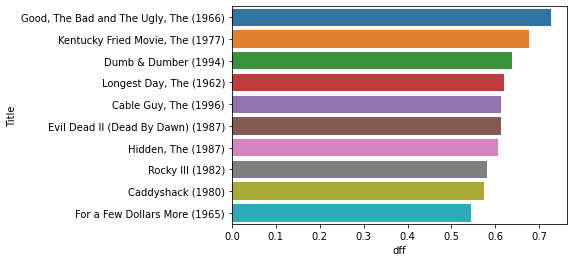

In [96]:
import seaborn as sns
sns.barplot(y=most_divisive_films.index, x=most_divisive_films.dff)